In [6]:
!pip install sklearn.cross_validation

ERROR: Could not find a version that satisfies the requirement sklearn.cross_validation (from versions: none)
ERROR: No matching distribution found for sklearn.cross_validation


In [7]:
# libs
import cv2
from emnist import extract_training_samples,extract_test_samples

import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

from keras.layers import Dense
from keras.models import Sequential, load_model
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping

from sklearn import datasets
from sklearn.model_selection import train_test_split

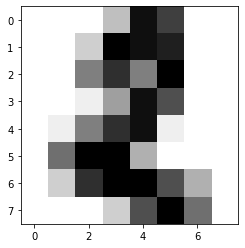

In [8]:
# data
digits = datasets.load_digits()

x = digits.data
n_cols = x.shape[1]
y = digits.target
y_binary = to_categorical(y)

plt.imshow(digits.images[2], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [9]:
early_stopping_monitor = EarlyStopping(patience = 5)

In [10]:
# model
model = Sequential()
model.add(Dense(2000, activation="relu", input_shape = (n_cols,)))
model.add(Dense(2000, activation="relu"))
model.add(Dense(2000, activation="relu"))
model.add(Dense(10,activation="softmax"))
model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics = ["accuracy"])

model2 = Sequential()
model2.add(Dense(2000, activation="relu", input_shape = (n_cols,)))
model2.add(Dense(2000, activation="relu"))
model2.add(Dense(10,activation="softmax"))
model2.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics = ["accuracy"])

model3 = Sequential()
model3.add(Dense(500, activation="relu", input_shape = (n_cols,)))
model3.add(Dense(500, activation="relu"))
model3.add(Dense(500, activation="relu"))
model3.add(Dense(10,activation="softmax"))
model3.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics = ["accuracy"])


In [11]:
model.fit(x,y_binary,epochs=20,validation_split=.2,callbacks=[early_stopping_monitor])
model2.fit(x,y_binary,epochs=20,validation_split=.2,callbacks=[early_stopping_monitor])
model3.fit(x,y_binary,epochs=20,validation_split=.2,callbacks=[early_stopping_monitor])

Epoch 1/20
45/45 [==============================] - 2s 50ms/step - loss: 1.4304 - accuracy: 0.7947 - val_loss: 0.3284 - val_accuracy: 0.9167
Epoch 2/20
45/45 [==============================] - 2s 46ms/step - loss: 0.0762 - accuracy: 0.9763 - val_loss: 0.3109 - val_accuracy: 0.9194
Epoch 3/20
45/45 [==============================] - 2s 47ms/step - loss: 0.0589 - accuracy: 0.9798 - val_loss: 0.5065 - val_accuracy: 0.8639
Epoch 4/20
45/45 [==============================] - 2s 45ms/step - loss: 0.0917 - accuracy: 0.9736 - val_loss: 0.4564 - val_accuracy: 0.8917
Epoch 5/20
45/45 [==============================] - 2s 45ms/step - loss: 0.0552 - accuracy: 0.9812 - val_loss: 0.4044 - val_accuracy: 0.9111
Epoch 6/20
45/45 [==============================] - 2s 46ms/step - loss: 0.0985 - accuracy: 0.9701 - val_loss: 0.3420 - val_accuracy: 0.9028
Epoch 7/20
45/45 [==============================] - 3s 56ms/step - loss: 0.0710 - accuracy: 0.9805 - val_loss: 0.3025 - val_accuracy: 0.9083
Epoch 8/20
45

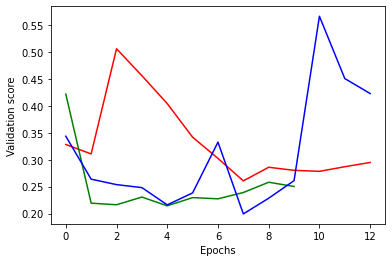

In [12]:
plt.plot(model.history.history['val_loss'], 'r', 
         model2.history.history['val_loss'], 'g',
         model3.history.history['val_loss'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()

In [16]:
def img_to_data(src,n):
    originalImage = cv2.imread(src)
    grayImage = cv2.cvtColor(originalImage, cv2.COLOR_BGR2GRAY)
    resizedImage = cv2.resize(grayImage, (n,n))
    rescaledImage = 16 - resizedImage*(16/255)
    return rescaledImage

def show_char(d):
    plt.imshow(d, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.show()
    
def dig_res(pred):
    digs = np.array([0,1,2,3,4,5,6,7,8,9])
    print(str(digs[max(pred) == pred]))

src1 = 'c:/Users/44751/Desktop/Data/Data/otto.png'
src2 = 'c:/Users/44751/Desktop/Data/Data/otto.png'
src3 = 'c:/Users/44751/Desktop/Data/Data/five.png'

img1 = img_to_data(src1,8)
img2 = img_to_data(src2,8)
img3 = img_to_data(src3,8)

imgs = np.array([img1.reshape(-1),
                img2.reshape(-1),
                img3.reshape(-1)])

In [17]:
pred = model.predict(np.array([img1.reshape(-1)]))

In [18]:
pred.argmax()

8

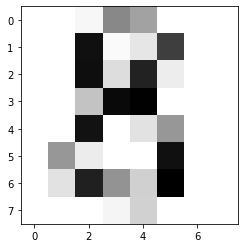

[8]


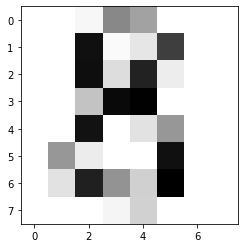

[8]


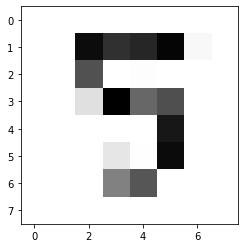

[5]


In [19]:
pred = model.predict(imgs)
show_char(img1)
dig_res(pred[0])
show_char(img2)
dig_res(pred[1])
show_char(img3)
dig_res(pred[2])

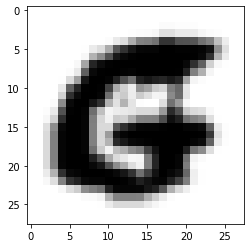

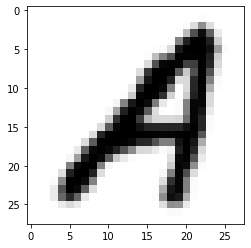

In [20]:
# data - letters
images, labels = extract_training_samples('letters')
t_images, t_labels = extract_test_samples('letters')
reshapedImages = images.reshape( (images.shape[0], 28*28))
labels_binary = to_categorical(labels - 1)

alphabet = np.array(["a","b","c","d","e","f","g","h","i","j","k","l","m","n","o","p","q","r","s","t","u","v","w","x","y","z"])

show_char(images[1])
show_char(t_images[1])

In [21]:
# model - letters
n_cols = len(reshapedImages[1])

L_model = Sequential()
L_model.add(Dense(784, activation="relu", input_shape = (n_cols,)))
L_model.add(Dense(784, activation="relu"))
L_model.add(Dense(784, activation="relu"))
L_model.add(Dense(784, activation="relu"))
L_model.add(Dense(26,activation="softmax"))
L_model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics = ["accuracy"])

L_model.fit(reshapedImages,
            labels_binary,
            epochs=20,
            validation_split=.2,
            callbacks=[early_stopping_monitor])

Epoch 1/20
3120/3120 [==============================] - 56s 18ms/step - loss: 1.1301 - accuracy: 0.7488 - val_loss: 0.6256 - val_accuracy: 0.8175
Epoch 2/20
3120/3120 [==============================] - 59s 19ms/step - loss: 0.5803 - accuracy: 0.8272 - val_loss: 0.5686 - val_accuracy: 0.8365
Epoch 3/20
3120/3120 [==============================] - 63s 20ms/step - loss: 0.5156 - accuracy: 0.8496 - val_loss: 0.5171 - val_accuracy: 0.8588
Epoch 4/20
3120/3120 [==============================] - 61s 20ms/step - loss: 0.4612 - accuracy: 0.8665 - val_loss: 0.5268 - val_accuracy: 0.8583
Epoch 5/20
3120/3120 [==============================] - 61s 20ms/step - loss: 0.4220 - accuracy: 0.8774 - val_loss: 0.5212 - val_accuracy: 0.8640
Epoch 6/20
3120/3120 [==============================] - 61s 20ms/step - loss: 0.3989 - accuracy: 0.8854 - val_loss: 0.4731 - val_accuracy: 0.8749
Epoch 7/20
3120/3120 [==============================] - 61s 20ms/step - loss: 0.3761 - accuracy: 0.8927 - val_loss: 0.4884 -

In [42]:
L_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 784)               615440    
_________________________________________________________________
dense_12 (Dense)             (None, 784)               615440    
_________________________________________________________________
dense_13 (Dense)             (None, 784)               615440    
_________________________________________________________________
dense_14 (Dense)             (None, 784)               615440    
_________________________________________________________________
dense_15 (Dense)             (None, 26)                20410     
Total params: 2,482,170
Trainable params: 2,482,170
Non-trainable params: 0
_________________________________________________________________


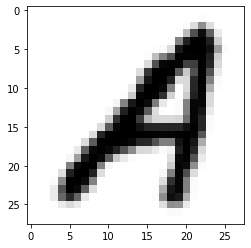

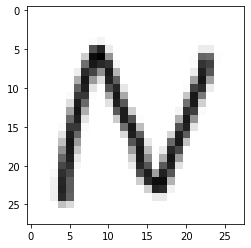

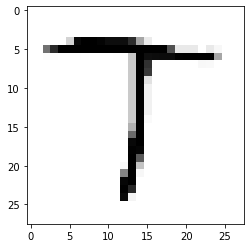

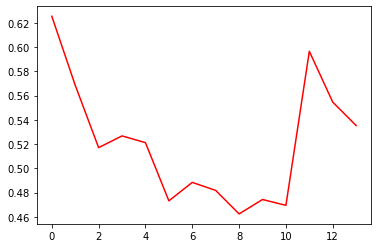

In [25]:
n1 = img_to_data("c:/Users/44751/Desktop/Data/Data/n.png",28)
r1 = img_to_data("c:/Users/44751/Desktop/Data/Data/r.png",28)
t1 = img_to_data("c:/Users/44751/Desktop/Data/Data/t.png",28)


ass = np.array([n1,r1,t1])
ass = ass.reshape((ass.shape[0], 28*28))
t_images_reshaped = t_images.reshape((t_images.shape[0], 28*28))

show_char(t_images[1])
show_char(n1)
show_char(t1)

plt.plot(L_model.history.history['val_loss'], 'r')

['n']


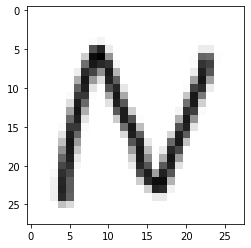

['r']


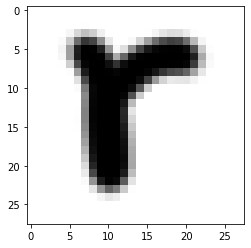

['t']


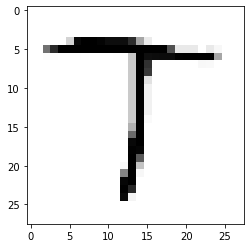

['a']


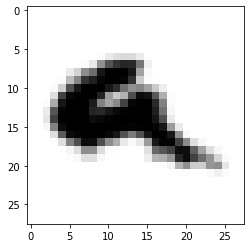

In [29]:
def alph_res(pred):
    return (alphabet[pred == max(pred)])

pred = L_model.predict(t_images_reshaped)
pred2 = L_model.predict(ass)

print(alph_res(pred2[0]))
show_char(n1)
print(alph_res(pred2[1]))
show_char(r1)
print(alph_res(pred2[2]))
show_char(t1)
print(alph_res(pred[0]))
show_char(t_images[0])

In [30]:
# export model
model.save("digits_model.h5py")
L_model.save("letters_model.h5py")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: digits_model.h5py\assets
INFO:tensorflow:Assets written to: letters_model.h5py\assets


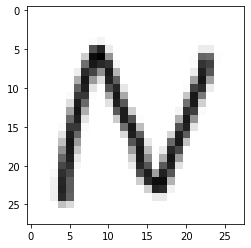

'n'

In [36]:
def img_to_data(src,n):
    originalImage = cv2.imread(src)
    grayImage = cv2.cvtColor(originalImage, cv2.COLOR_BGR2GRAY)
    resizedImage = cv2.resize(grayImage, (n,n))
    rescaledImage = 16 - resizedImage*(16/255)
    return rescaledImage

def show_char(d):
    plt.imshow(d, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.show()

alphabet = np.array(["a","b","c","d","e","f","g","h","i","j","k","l","m","n","o","p","q","r","s","t","u","v","w","x","y","z"])

def alph_res(pred):
    return alphabet[pred == max(pred)][0]

# import model
dig_m = load_model("digits_model.h5py")
let_m = load_model("c:/Users/44751/Desktop/letters_model.h5py")

# summary
# dig_m.summary()
# let_m.summary()

pred = let_m.predict(ass)
show_char(n1)
alph_res(pred[0])